## ___Credit Card Fraud Detection___

_The datasets contains transactions made by credit cards in September 2013 by european cardholders._

_This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions._

_It contains only numerical input variables which are the result of a PCA transformation._

_Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'._

_Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning._

_Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise._

_https://www.kaggle.com/mlg-ulb/creditcardfraud_

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv('/content/drive/My Drive/creditcard.csv',sep=',')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# Checking Null Values
data.isnull().values.any()

False

_There are no "Null" values, so we don't have to work on ways to replace values._

In [5]:
# Checking the Positive Class count
(data['Class'].value_counts()/data.shape[0])*100

0    99.827251
1     0.172749
Name: Class, dtype: float64

_Most of the transactions were Non-Fraud (99.83%) of the time, while Fraud transactions occurs (0.17%) of the time in the dataframe._

___NEXT STEP:___ _The description says that all the features went through a PCA transformation (Dimensionality Reduction technique) (Except for time and amount). Keep in mind that in order to implement a PCA transformation features need to be scaled that means all the V features have been scaled previously._

Text(0.5, 1.0, '0: No Fraud & 1: Fraud')

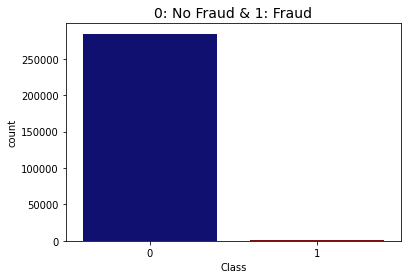

In [6]:
sns.countplot('Class', data=data, palette=['navy', 'darkred'])
plt.title('0: No Fraud & 1: Fraud', fontsize=14)

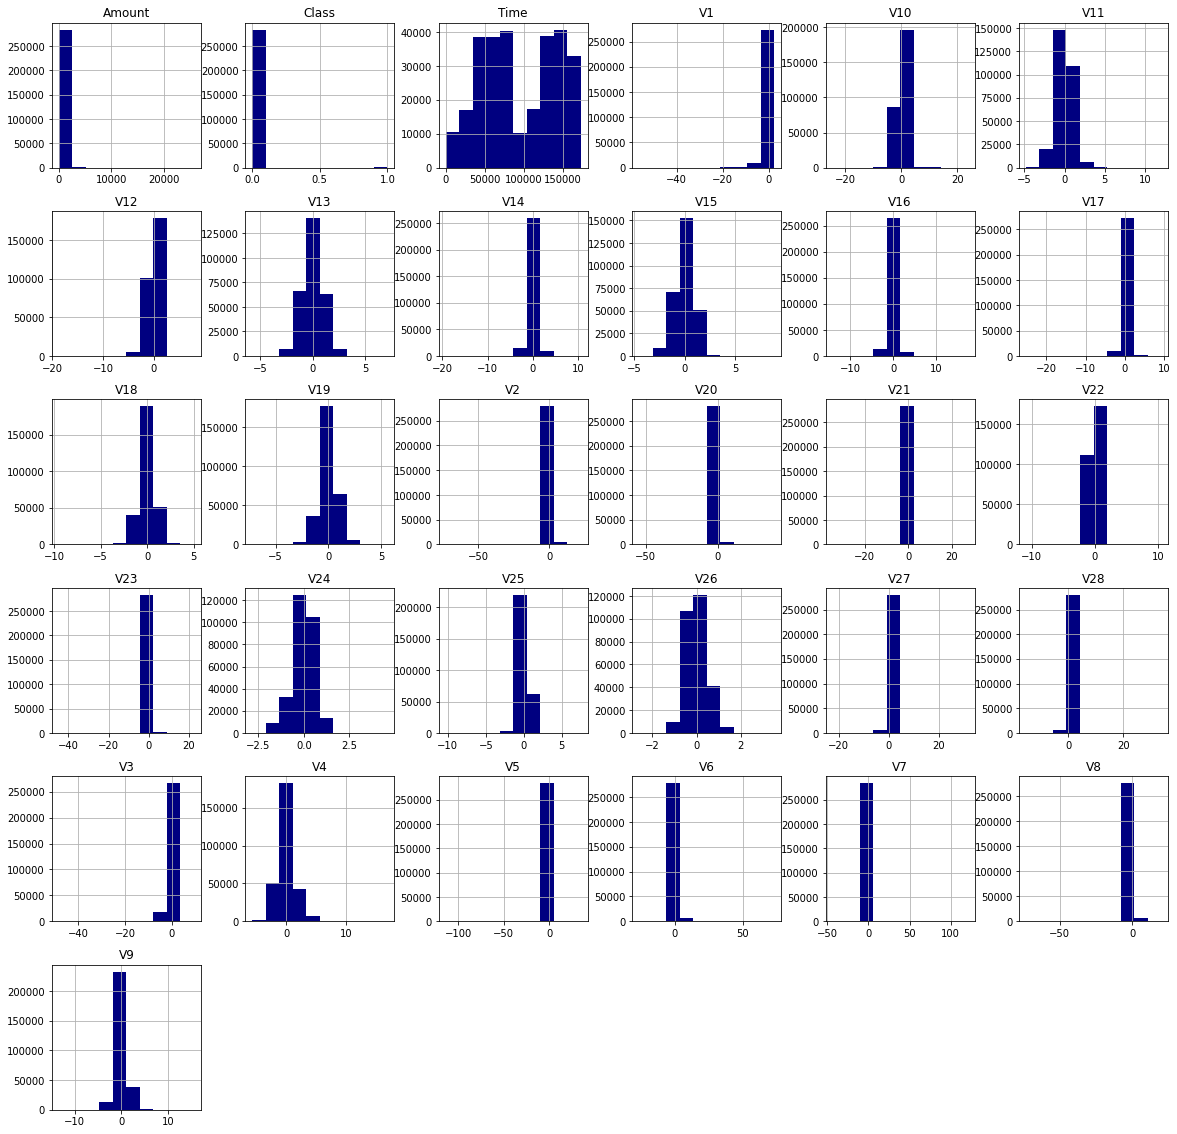

In [7]:
data.hist(figsize=(20,20),color='navy')
plt.show()

In [8]:
data['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

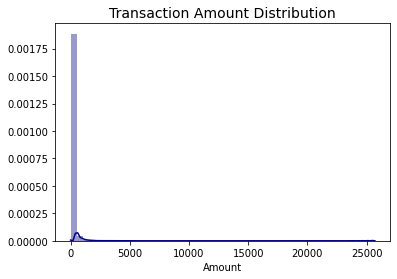

In [9]:
sns.distplot(data['Amount'], color='navy')
plt.title('Transaction Amount Distribution', size=14)
plt.show()

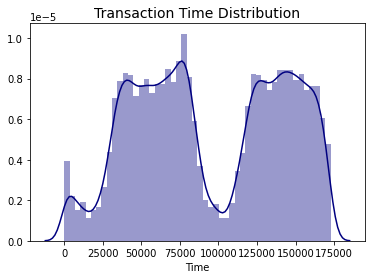

In [10]:
sns.distplot(data['Time'], color='navy')
plt.title('Transaction Time Distribution', size=14)
plt.show()

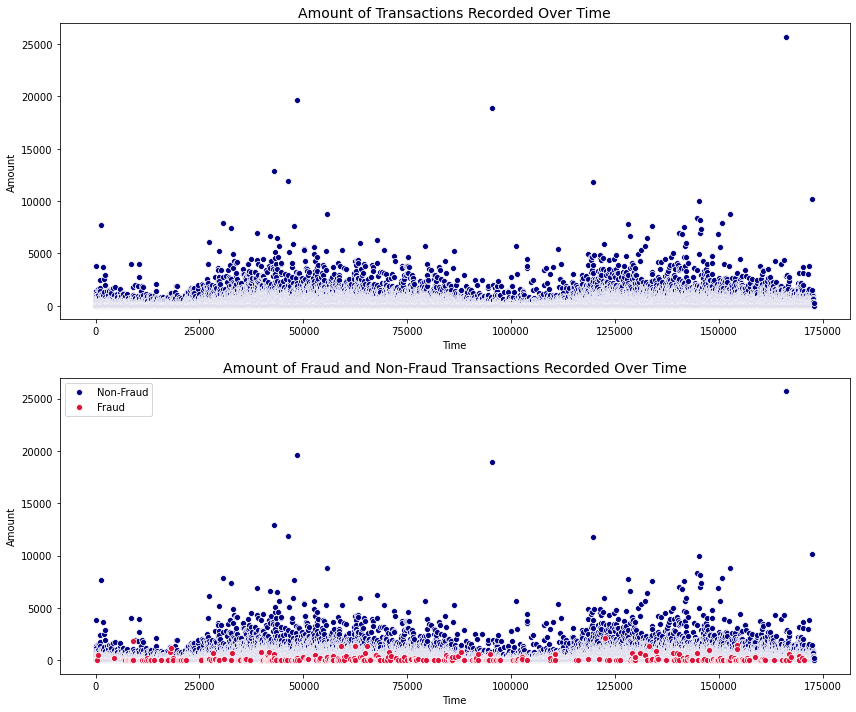

In [11]:
not_Fraud = data[data['Class']==0]
Fraud = data[data['Class']==1]
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))
sns.scatterplot(x='Time', y='Amount', data=data, color='navy', ax=axs[0])
sns.scatterplot(x='Time', y='Amount', data=not_Fraud, color='navy', label='Non-Fraud', ax=axs[1])
sns.scatterplot(x='Time', y='Amount', data= Fraud, color='crimson', label='Fraud', ax=axs[1])
axs[0].set_title('Amount of Transactions Recorded Over Time', size=14)
axs[1].set_title('Amount of Fraud and Non-Fraud Transactions Recorded Over Time', size=14)
plt.tight_layout()
plt.show()

_With this graph it looks like time does not have any impact on frauds. Therefore, we can remove this feature._

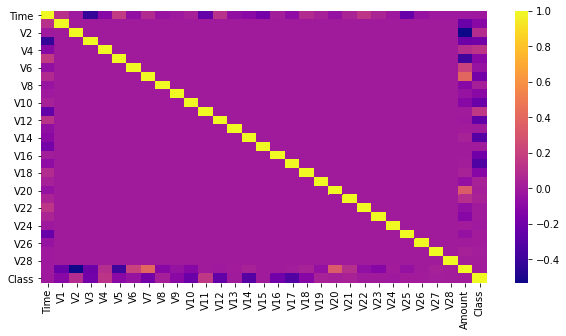

In [12]:
df_corr = data.corr()

plt.figure(figsize = (10,5))
sns.heatmap(df_corr, cmap = 'plasma')
plt.show()

In [0]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount)
# RobustScaler is less prone to outliers.
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()

data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))

data.drop(['Time','Amount'], axis=1, inplace=True)
# Scaled amount is the columns with scaled values.

In [14]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579


In [0]:
# Splitting Original Data in Train Test
from sklearn.model_selection import train_test_split

X = data.drop('Class', axis=1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
y_test.value_counts()

0    56864
1       98
Name: Class, dtype: int64

### ___Imbalanced Data___

___The METRIC TRAP___

_One of the major issues that novice users fall into when dealing with unbalanced datasets relates to the metrics used to evaluate their model. Using simpler metrics like accuracyscore can be misleading. In a dataset with highly unbalanced classes, if the classifier always "predicts" the most common class without performing any analysis of the features, it will still have a high accuracy rate, obviously illusory._

_Metrics that can provide better insight include:_

* ___Confusion Matrix:___ _a table showing correct predictions and types of incorrect predictions._

* ___Precision:___ _the number of true positives divided by all positive predictions. Precision is also called Positive Predictive Value. It is a measure of a classifier’s exactness. Low precision indicates a high number of false positives._

* ___Recall:___ _the number of true positives divided by the number of positive values in the test data. Recall is also called Sensitivity or the True Positive Rate. It is a measure of a classifier’s completeness. Low recall indicates a high number of false negatives._

* ___F1 Score:___ _the weighted average of precision and recall._

___Resampling Techniques___

_A widely adopted technique for dealing with highly unbalanced datasets is called resampling. It consists of removing samples from the majority class (under-sampling) and / or adding more examples from the minority class (over-sampling)._

_As the number of data points for a fraudlent transactions are very less we need to choose a sampling technique to train our model effectively._

* ___Over-Sampling/Upsample___
* ___Under-Sampling/Downsample___
* ___SMOTE (Synthetic Minorrity Oversampling Technique)___

_Oversampling before splitting the data can allow the exact same observations to be present in both the test and train sets. This can allow our model to simply memorize specific data points and cause overfitting and poor generalization to the test data._

In [0]:
# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

___1: Random over-sampling minority class___

_Oversampling can be defined as adding more copies of the minority class. Oversampling can be a good choice when you don’t have a ton of data to work with._

In [18]:
from sklearn.utils import resample

# separate minority and majority classes
not_fraud = X[X.Class==0]
fraud = X[X.Class==1]

# upsample minority
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and oversampled minority
oversampled = pd.concat([not_fraud, fraud_upsampled])

# check new class counts
oversampled.Class.value_counts()

1    227451
0    227451
Name: Class, dtype: int64

In [0]:
# getting X_train and y_train back
y_train_o = oversampled.Class
X_train_o = oversampled.drop('Class', axis=1)

___2: Random under-sampling majority class___

_Undersampling can be defined as removing some observations of the majority class. Undersampling can be a good choice when you have a ton of data -think millions of rows. But a drawback is that we are removing information that may be valuable. This could lead to underfitting and poor generalization to the test set._

In [20]:
# downsample majority
not_fraud_downsampled = resample(not_fraud,
                                replace = False, # sample without replacement
                                n_samples = len(fraud), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([not_fraud_downsampled, fraud])

# checking counts
downsampled.Class.value_counts()

## Another way for Random Under-Sampling ##
#df = data.sample(frac=1) # Shuffling the whole dataset

# amount of fraud classes 492 rows.
#fraud_df = df.loc[df['Class'] == 1]
#non_fraud_df = df.loc[df['Class'] == 0][:492]

#new_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
#new_df = new_distributed_df.sample(frac=1, random_state=42)

1    394
0    394
Name: Class, dtype: int64

In [0]:
# getting X_train and y_train back
y_train_d = downsampled.Class
X_train_d = downsampled.drop('Class', axis=1)

___3: SMOTE___

_Synthetic Minority Over-sampling Technique has been designed to generate new samples that are coherent with the minor class distribution. The main idea is to consider the relationships that exist between samples and create new synthetic points along the segments connecting a group of neighbors._

In [0]:
from imblearn.over_sampling import SMOTE # Same package can also be used for above 2 techniques

sm = SMOTE(random_state=27)
X_train_s, y_train_s = sm.fit_resample(X_train, y_train)

# Smote is always applied to Train set and not on test set

### ___Modeling___

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 
# for tunnig hyper parameter it will use all combination of given parameters
from sklearn.model_selection import RandomizedSearchCV 
# same for tunning hyper parameter but will use random combinations of parameters

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

classifiers = {
    "Logisitic Regression": {
        "model":LogisticRegression(random_state = 27),
        "parameters": {
            "penalty": ['l1', 'l2'],
            'C': [0.001, 0.01, 0.1, 1, 10, 100]
        }
    },
    
#    "Support Vector Classifier": {
#        "model":SVC(random_state = 27),
#        "parameters": {
#            'C': [0.5, 0.7, 0.9, 1], 
#            'kernel': ['rbf', 'poly', 'sigmoid', 'linear']
#        }
#    },
#    
#    "K Nearest Neighbors": {
#        "model":KNeighborsClassifier(n_jobs = -1),
#        "parameters": {
#            "n_neighbors": list(range(2,5,1)), 
#            "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute']
#        }
#    },
#    
#    "Decision Tree Classifier": {
#        "model":DecisionTreeClassifier(random_state = 27),
#        "parameters": {
#            "criterion": ["gini", "entropy"], 
#            "max_depth": list(range(2,4,1)), 
#            "min_samples_leaf": list(range(5,7,1))
#        }
#    },
#    
#    "Random Forest": {
#        "model": RandomForestClassifier(n_jobs = -1, random_state= 27),
#        "parameters":{
#            'n_estimators': [10, 100, 500], 
#            'max_features': ['auto', 'sqrt', 'log2'], 
#            'min_samples_leaf' : [len(X_train)//10000, len(X_train)//28000, len(X_train)//50000, len(X_train)//100000]
#        }
#    },
#    
#    "XGBoost": {
#        "model":XGBClassifier(random_state = 27, n_jobs = -1),
#        "parameters": {
#            'max_depth': [1,3], 
#            'min_child_weight': [1,3], 
#            'n_estimators': [100,200], 
#            'scale_pos_weight': [1, 0.1, 0.017]
#        }
#   }  
}

In [0]:
# defining model metrics
from sklearn.metrics import roc_auc_score,f1_score,precision_score, accuracy_score, recall_score, precision_recall_curve, auc, confusion_matrix

score_comparison = []

def get_result_report(probs, y_test, y_pred, model_name, data_type, estimator, cv_score, score_comparison = score_comparison):
    
    cnf_matrix = confusion_matrix(y_test,y_pred)
    #create a heat map
    sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
    plt.xlabel('Predicted')
    plt.ylabel('Expected')
    plt.show()

    # calculate precision-recall curve
    precision, recall, thresholds = precision_recall_curve(y_test, probs)
    # calculate precision-recall AUC
    auc_pr = auc(recall, precision)
    plt.plot([0, 1], [0.5, 0.5], linestyle='--')
    # plot the precision-recall curve for the model
    plt.plot(recall, precision, marker='.')
    plt.title("Precison-Recall Curve | AUC score: {:.3f}".format(auc_over))
    # show the plot
    plt.show()
    
    stats = {
        'Model': model_name,
        'Data': data_type,
        'Estimator': estimator,
        'ROC_AUC Score': roc_auc_score(y_test, y_pred),
        'Accuracy Score': accuracy_score(y_test, y_pred),
        'FN': cnf_matrix[1][0],
        'TP': cnf_matrix[1][1],
        'FP': cnf_matrix[0][1],
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'AUC_Prec_Recall': auc_over,
        'F1-Score': f1_score(y_test, y_pred),
        'CV Score': cv_score
    }
    
    score_comparison.append(stats)

In [0]:
# we can also do the same analysis with Gridsearchcv which will take more time.

def get_best_trained_model_score(X_train, y_train, Data_Type, X_test = X_test, y_test = y_test):
    for key, classifier in classifiers.items():
        
        print('Random Search started for: ', key)
        rs_model = RandomizedSearchCV(classifier['model'], param_distributions = classifier['parameters'], scoring='f1', cv=5)
        rs_model.fit(X_train, y_train)
        
        best = rs_model.best_estimator_
        
        cv_score = cross_val_score(best, X_train, y_train, cv=3)
        
        best.fit(X_train,y_train)
        y_pred = best.predict(X_test)
        
        # predict probabilities
        probs = best.predict_proba(X_test)
        
        # keep probabilities for the positive outcome only
        probs = probs[:, 1]

        print('Model Performance Stats: ')
        get_result_report(probs, y_test, y_pred, key, Data_Type, best, round(cv_score.mean() * 100, 2).astype(str) + '%')

Random Search started for:  Logisitic Regression
Model Performance Stats: 


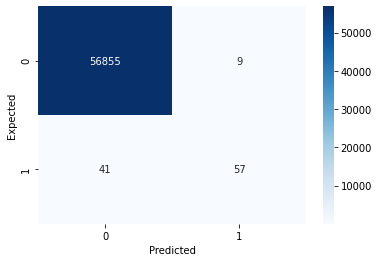

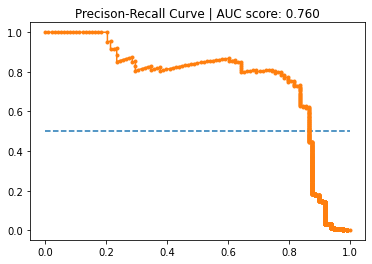

----------------------------------------------------------


In [26]:
# models on normal data
get_best_trained_model_score(X_train, y_train, 'Normal')

Random Search started for:  Logisitic Regression
Model Performance Stats: 


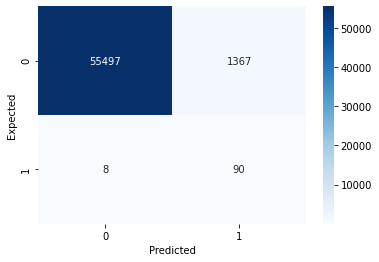

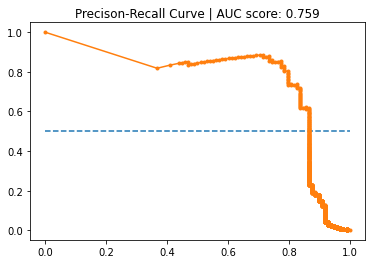

----------------------------------------------------------


In [27]:
# models on over sampled data
get_best_trained_model_score(X_train_o, y_train_o, 'Over Sampled')

Random Search started for:  Logisitic Regression
Model Performance Stats: 


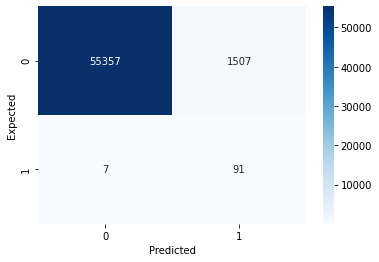

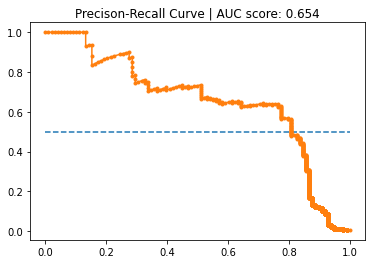

----------------------------------------------------------


In [28]:
# models on under sampled data
get_best_trained_model_score(X_train_d, y_train_d, 'Under Sampled')

Random Search started for:  Logisitic Regression
Model Performance Stats: 


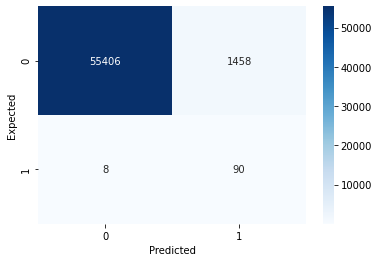

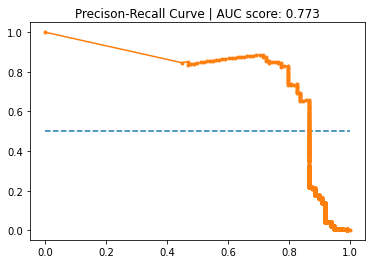

----------------------------------------------------------


In [29]:
# models on SMOTE data
get_best_trained_model_score(X_train_s, y_train_s, 'SMOTE')

In [31]:
scores = pd.DataFrame(score_comparison)
scores

,Model,Data,Estimator,ROC_AUC Score,Accuracy Score,FN,TP,FP,Precision,Recall,F1-Score,CV Score
0,Logisitic Regression,Normal,"LogisticRegression(C=10, class_weight=None, du...",0.790737,0.999122,41,57,9,0.863636,0.581633,0.695122,99.92%
1,Logisitic Regression,Over Sampled,"LogisticRegression(C=100, class_weight=None, d...",0.947164,0.975861,8,90,1367,0.061771,0.918367,0.115756,94.69%
2,Logisitic Regression,Under Sampled,"LogisticRegression(C=0.1, class_weight=None, d...",0.951035,0.973421,7,91,1507,0.056946,0.928571,0.107311,94.16%
3,Logisitic Regression,SMOTE,"LogisticRegression(C=10, class_weight=None, du...",0.946364,0.974264,8,90,1458,0.058140,0.918367,0.109356,94.63%


In [32]:
scores['F1-Score'].tolist()

[0.6951219512195121,
 0.1157556270096463,
 0.10731132075471697,
 0.10935601458080195]

In [0]:
# F1 Score list for all models
f1 = scores['F1-Score'].tolist()
# AUC Score list for all models
auc = scores['AUC_Prec_Recall'].tolist()
# Name List of ML Models used
models = scores['Data'].tolist()
y_pos = np.arange(len(models))

# Plot F1 Score
plt.figure(figsize=(10, 6))  
plt.bar(y_pos, f1, align='center', alpha=0.8, color=sns.color_palette("PuBu"))
plt.xticks(y_pos, models)
plt.ylabel('F1 Score')
plt.title('Performance based on F1 Score')

# Plot AUC Score
plt.figure(figsize=(10, 6))  
plt.bar(y_pos, auc, align='center', alpha=0.8, color=sns.color_palette("PuBu"))
plt.xticks(y_pos, models)
plt.ylabel('AUC Score')
plt.title('Performance based on AUC Score - Precision Recall Curve')

_Based on our evaluation metrics (F1-Score & PR AUC  Value) we can see that Over-Sampling techniques and SMOTE performed better when compared to undersampling of majority class. Yet it is still hard to pick a winner._

_The algorithm we used in all the scenario was Logistic Regression, but I have provided the code for various different models which we can try (execution time will be subject to machine strength)._